# `R` básico -  control de flujo y funciones

Los programas (sobre todo procedurales) como los que haremos en R son diseñados a partir de bloques comunes, **constructs**. Tres básicos son: secuencia (el orden en que ocurrirán las instrucciones), selección (que determina en qué ruta se ejecutan, siguiendo declaraciones condicionales) e iteración (que ejecuta una secuencia de forma repetida, que puede ser definido o indefinido).

El control de flujo lo usamos para escribir declaraciones condicionales utilizando `if()` y `else()`, y para hacer que algo suceda un número determinado de veces usamos ciclos (o bucles) `for()`. El control de flujo sirve para establecer bajo qué condiciones, por cuánto número de veces, o ambas, puede suceder algo.

Comenzamos con los constructs `if()` y `else()`, después con seguimos con los ciclos `for()` y `while()` (para iteraciones definidas e indefinidas, respectivamente). La bola extra son las funciones, que se pueden declarar usando `function()`.

In [7]:
# asignar un valor a un vector "a"
a <- 4
if (a > 5) {
  # si TRUE, imprimir en consola "mayor a 5", y restar a-1
  print("mayor a 5")
  a <- a - 1
} else {
  # si FALSE, imprimir "menor a 5" y sumar a+1
  print("menor a 5")
  a <- a + 1
}

[1] "menor a 5"


Si se tiene un vector con más de 1 elemento, `if()` arroja un `Error` en la versión 4.2.0 de R, pero en versiones anteriores (<=4.1.2) solo toma el primero para hacer la comparación y arroja un `Warning`.

In [8]:
a <- c(5, 2, 3)
if (a >= 5) {
  print("mayor a 5")
} else {
  print("menor a 5")
}

ERROR: Error in if (a >= 5) {: the condition has length > 1


Si se quiere saber si *todos* los valores sean mayores a 5, usar `all()`

In [6]:
a <- c(5, 2, 3)
all(a > 5) # lo que obviamente es falso, ningun elemento es mayor que 5

[1] FALSE

In [ ]:
# pero esto es verdadero
a <- 6:10
all(a > 5)

In [ ]:

# si se quiere que *al menos un elemento* cumpla la condición, usar any

a <- c(3, 4, 6)

any(a > 5)


# ifelse - pairwise

a <- 1:10
b <- ifelse(a > 5, "yes", "no")
b
df_tmp <- data.frame(
  sexo = c("M", "F", "Hombre")
)

df_tmp$sexo <- ifelse(df_tmp$sexo == "Hombre", "M", df_tmp$sexo)
df_tmp

## Ciclos for y while

In [ ]:
# definir dos vectores
a <- 1:10
b <- 1:10

# pre-reservar espacio en un vector vacío
res <- numeric(length = length(a))
# otra alternativa es usar un vector con NAs. Esto suele ser preferido debido a 
# que, si uno de los valores naturales que obtendremos en el cómputo es 0, 
# no sabremos si es un 0 
res <- rep(NA, length(a))


for (i in seq_along(a)) {
  res[i] <- a[i] + b[i]
}


a + b

# se pueden hacer cosas más complejas; por ejemplo, guardar en una carpeta
# diferentes archivos csv

df_vacio <- data.frame()

parent_folder <- "C:/Users/T480/Desktop/archivos_csv/"

for (i in 1:5){
  
  data_tmp <- rnorm(100, 1 + i * 2, 2)
  
  df_tmp <- data.frame(
    columna1 = data_tmp,
    columna2 = letters[i]
  )
  
  df_vacio <- rbind(df_vacio, df_tmp)
  write.csv(df_tmp, file = paste0(parent_folder, "data_", letters[i], ".csv"))
}


# recordar cómo se forman los data.frames, que son en esencia datos
# tabulares, en donde cada columna es un vector, y todas las columnas
# pueden tener diferentes tipos de datos
# las columnas se declaran colocando el nombre de la columna
df_ejemplo <- data.frame(
  a = 1:10,
  b = letters[1:10]
)
str(df_ejemplo)


## Funciones


In [ ]:

# funciones ----

# hacer una función que convierta fahrenheit a celcius

fahrenheit_to_celsius <- function(temp_F) {
  
  temp_C <- (temp_F - 32) * 5 / 9

  return(temp_C)
}


fahrenheit_to_celsius(32)

fahrenheit_to_celsius()


# ahora hacer una que convierta celcius a kalvin 

celsius_to_kelvin <- function(temp_C) {
  temp_K <- temp_C + 273.15
  return(temp_K)
}

celsius_to_kelvin()
# ahora de fahrenheit a kalvin, que use como intermediario celcius

fahrenheit_to_kelvin <- function(temp_F) {
  temp_C <- fahrenheit_to_celsius(temp_F)
  temp_K <- celsius_to_kelvin(temp_C)
  return(temp_K)
}

fahrenheit_to_kelvin(32)


## Combinar varias



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.143 -22.095  -1.385  25.940  83.795 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6443     7.2617   0.502    0.617    
x            10.0994     0.1255  80.499   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.58 on 98 degrees of freedom
Multiple R-squared:  0.9851,	Adjusted R-squared:  0.9849 
F-statistic:  6480 on 1 and 98 DF,  p-value: < 2.2e-16



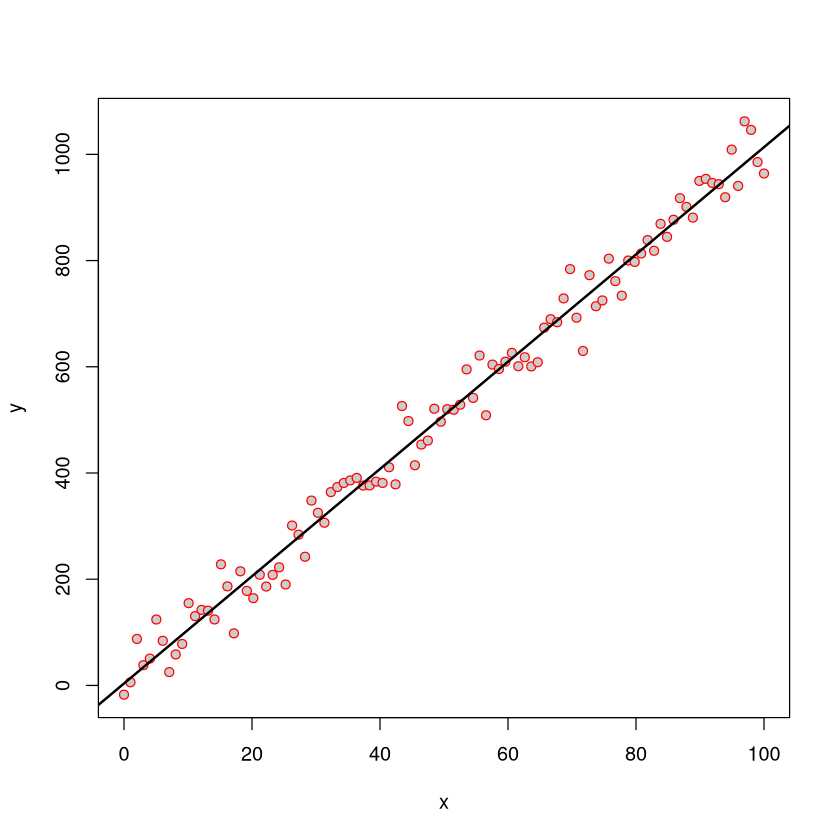

In [3]:

lm_plot_sim <- function(a, b, media, desv_est, n = 100, seed = TRUE) {
  # Parar y mostrar error si desv_est es negativo
  if (desv_est <= 0) {
    stop("Error: argument desv_est should greater than 0")
  }
  # declarar x
  x <- seq(0, 100, len = n)
  # usar eq de la recta
  y <- a + b * x
  # crear error normal
  error <- rnorm(n = n, mean = media, sd = desv_est)
  # fijar semilla para reproducibilidad
  if (seed) {
    set.seed(123)
  }
  # añadir error a y
  y <- y + error
  # graficar
  plot(x, y, pch = 21, col = 'red', bg = 'gray80')
  # regresion linear ols
  lm1 <- lm(y ~ x)
  # extraer coeficientes
  coeficientes <- coef(lm1)
  # añadir recta de regresion
  abline(a = coeficientes[1], b = coeficientes[2], lwd = 2)
  # imprimir coeficientes y summary
  print(summary(lm1))
} 

lm_plot_sim(a = 5, 10, media = 0, desv_est = 40)
